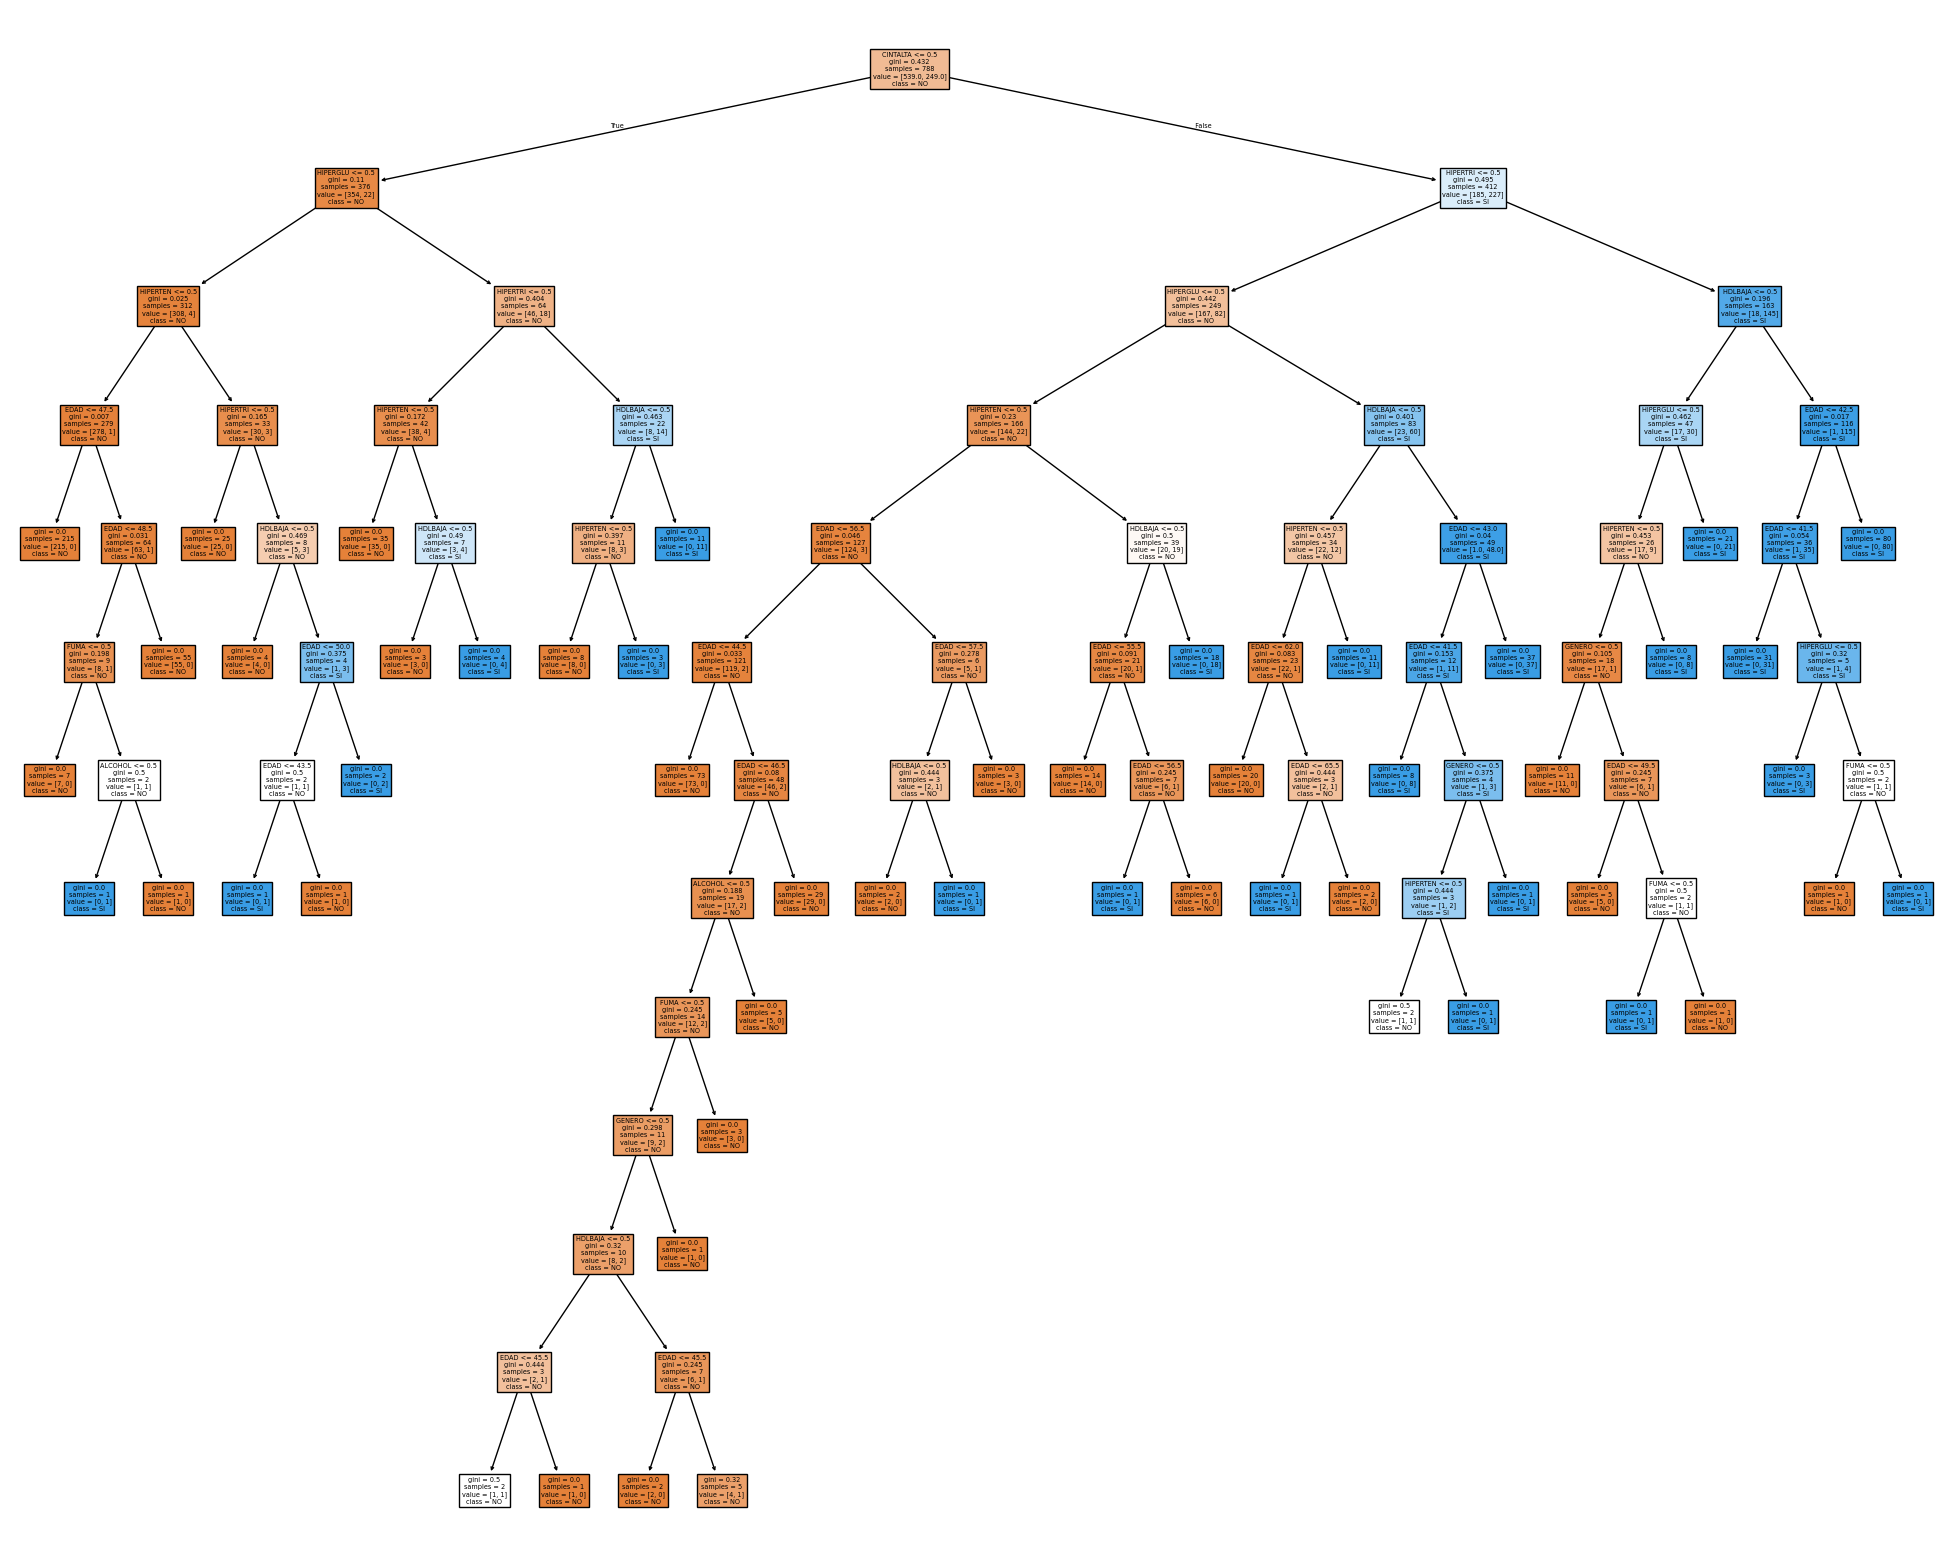

Verdaderos Negativos:
145
Falsos Negativos:
2
Falsos Positivos:
5
Verdaderos Positivos:
45
Precisión:
0.9644670050761421
Precisión No:
0.9666666666666667
Precisión Si:
0.9574468085106383


In [4]:
import pandas as pd
#cargando los datos
pacientes = pd.read_csv('patients.csv', engine="python", index_col=0)
#print(pacientes.head())

#obteniendo los datos del dataset
#pacientes.info()

#variable predictoras
X = pacientes.iloc[:,1:11]

#variable a predecir
Y = pacientes.iloc[:,0]

# X.head()
# Y.head()

#80 y 20
from sklearn.model_selection import train_test_split
#separa los datos
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.80, random_state=0)
#muestra lo que hace
# X_train.info()

#se trae de la libreria el clasificador
from sklearn.tree import DecisionTreeClassifier

#construyendo el arbol, se trae todo lo de la libreria a la clase arbol
arbol = DecisionTreeClassifier()

#entrenar el modelo
arbol_enfermedad = arbol.fit(X_train, Y_train)

#graficando nuestro arbol
from matplotlib import pyplot as plt  
from sklearn import tree

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(arbol_enfermedad, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)
plt.show()

#predecir
Y_pred = arbol_enfermedad.predict(X_test)

# Y_pred

from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(Y_test, Y_pred)
# matriz_confusion

import numpy as np

print("Verdaderos Negativos:")
verdaderos_negativos = matriz_confusion[0][0]
print(verdaderos_negativos)
print("Falsos Negativos:")
falsos_negativos = matriz_confusion[1][0]
print(falsos_negativos)
print("Falsos Positivos:")
falsos_positivos = matriz_confusion[0][1]
print(falsos_positivos)
print("Verdaderos Positivos:")
verdaderos_positivos = matriz_confusion[1][1]
print(verdaderos_positivos)
print("Precisión:")
precision = np.sum(matriz_confusion.diagonal())/np.sum(matriz_confusion)
print(precision)
print("Precisión No:")
precision_no = verdaderos_negativos/ sum(matriz_confusion[0,])
print(precision_no) 
print("Precisión Si:")
precision_si = verdaderos_positivos/ sum(matriz_confusion[1,])
print(precision_si)